In [1]:
from pathlib import Path

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

In [2]:
def cm_to_inches(cm):
    return cm / 2.54

In [3]:
mpl.style.use(['seaborn-darkgrid', 'seaborn-paper'])

paths

In [4]:
SOURCE_DATA_ROOT = pyprojroot.here('results/searchstims/source_data/10stims')

constants

In [5]:
LEARNING_RATE = 1e-3

NET_NAMES = [
    'alexnet',
    'VGG16',
    'CORnet_Z',
    'CORnet_S',
]

METHODS = [
    'initialize',
    'transfer'
]

MODES = [
    'classify',
]

## load source data

Get just the transfer learning results, then group by network, stimulus, and set size, and compute the mean accuracy for each set size.

In [6]:
df_all = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('all.csv')
)

stim_acc_diff_df = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('stim_acc_diff.csv')
)

net_acc_diff_df = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('net_acc_diff.csv')
)


columns will be stimuli, in increasing order of accuracy drop across models

In [7]:
FIG_COLUMNS = stim_acc_diff_df['stimulus'].values.tolist()
print(FIG_COLUMNS)

['Bx_v_RxRo', 'YT_v_BTBL', 'Bx_v_RxBo', 'RVvGV', 'RVvRHGV', 'PWVvPWHCV', 'PWVvCV', 'TvT', 'YT_v_BTYL', '2_v_5']


rows will be nets, in decreasing order of accuracy drops across stimuli

In [8]:
FIG_ROWS = net_acc_diff_df['net_name'].values.tolist()
print(FIG_ROWS)

['CORnet_S', 'CORnet_Z', 'VGG16', 'alexnet']


## plot figure

In [24]:
FIG_ROWS

['CORnet_S', 'CORnet_Z', 'VGG16', 'alexnet']

In [24]:
df_acc_diff_pivot = df_acc_diff.pivot_table(index='net_name', columns='stimulus')
df_acc_diff_pivot.columns = df_acc_diff_pivot.columns.get_level_values(1)
df_acc_diff_stim_cols = pd.DataFrame(df_acc_diff_pivot.to_records())
df_acc_diff_stim_cols = df_acc_diff_stim_cols.set_index('net_name')
df_acc_diff_stim_cols.reindex(FIG_ROWS)
df_acc_diff_stim_cols = df_acc_diff_stim_cols[FIG_COLUMNS]
df_acc_diff_stim_cols

,Bx_v_RxRo,YT_v_BTBL,Bx_v_RxBo,2_v_5,RVvGV,YT_v_BTYL,RVvRHGV,TvT,PWVvPWHCV,PWVvCV
net_name,,,,,,,,,,
CORnet_S,0.140625,0.157812,0.186719,0.105469,0.183594,0.225781,0.255469,0.251563,0.301563,0.361719
CORnet_Z,0.140625,0.157812,0.186719,0.105469,0.183594,0.225781,0.255469,0.251563,0.301563,0.361719
VGG16,0.084375,0.066406,0.076563,0.250000,0.242969,0.133594,0.258594,0.205469,0.315625,0.325000
alexnet,0.017187,0.035156,0.092187,0.110938,0.042187,0.264062,0.233594,0.337500,0.362500,0.371875


In [25]:
acc_diff_mat = df_acc_diff_stim_cols.to_numpy()
acc_diff_stim_mean = acc_diff_mat.mean(0)
acc_diff_net_mean = acc_diff_mat.mean(1)

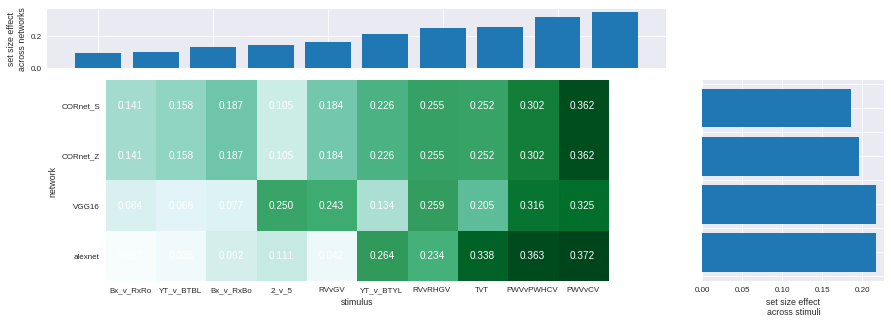

In [26]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])


ax_joint.imshow(acc_diff_mat, cmap=plt.get_cmap('BuGn'))
ax_joint.grid(False)
ax_joint.set_xticks(np.arange(acc_diff_mat.shape[1]))
ax_joint.set_yticks(np.arange(acc_diff_mat.shape[0]))
ax_joint.set_xticklabels(df_acc_diff_stim_cols.columns)
ax_joint.set_yticklabels(df_acc_diff_stim_cols.index.values)
for i in range(acc_diff_mat.shape[0]):
    for j in range(acc_diff_mat.shape[1]):
        text = ax_joint.text(j, i, f'{acc_diff_mat[i, j]:0.3f}', 
                             ha="center", va="center", color="w")

ax_marg_x.bar(np.arange(len(acc_diff_stim_mean)), acc_diff_stim_mean)
ax_marg_y.barh(np.arange(len(acc_diff_net_mean)), acc_diff_net_mean)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('stimulus')
ax_joint.set_ylabel('network')

# Set labels on marginals
ax_marg_y.set_xlabel('set size effect\nacross stimuli')
ax_marg_x.set_ylabel('set size effect\nacross networks')
plt.show()

In [19]:
df[(df['net_name'] == net_name)
    & (df['method'] == method)
    % (df['mode'] == mode)
    & (df['stimulus'] == stimulus)]

,Unnamed: 0,net_name,method,mode,learning_rate,net_number,stimulus,set_size,target_condition,accuracy,hit_rate,false_alarm_rate,d_prime
0,0,alexnet,initialize,classify,0.001,1,RVvGV,1,present,1.0,NaN,NaN,NaN
1,1,alexnet,initialize,classify,0.001,1,RVvGV,2,present,1.0,NaN,NaN,NaN
2,2,alexnet,initialize,classify,0.001,1,RVvGV,4,present,1.0,NaN,NaN,NaN
3,3,alexnet,initialize,classify,0.001,1,RVvGV,8,present,1.0,NaN,NaN,NaN
4,4,alexnet,initialize,classify,0.001,1,RVvGV,1,absent,1.0,NaN,NaN,NaN
